# Data Exploration and Preprocessing
File ini merupakan file yang digunakan untuk eksplorasi dataset yang telah diberi label.
Selain itu pada file ini juga dilakukan pembersihan dan preprocessing data yang kemudian data tersebut disimpan kembali ke dalam bentuk .csv sebagai data latih dan uji terhadap model. 

## Import Library
- Bagian ini merupakan bagian untuk mengimpor library yang dibutuhkan.

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

import warnings
warnings.filterwarnings('ignore')

## Eksplorasi Data
Tahapan ini merupakan tahapan yang dilakukan untuk mengetahui informasi data, dan menentukan proses apa yang akan dilakukan berdasarkan informasi data

### Read Dataset
- Tahapan untuk membaca dataset yang telah diberi label

In [2]:
df = pd.read_csv('../data/clean/question_list_labeled.csv')
df.head()

,question,label
0,Internet mati nih,Problem
1,Harga STB berapa ya?,Information
2,Internet saya putus sambung,Problem
3,Mengapa saya tidak dapat mengisi formulir relokasi? setelah disubmit hanya blank,Problem
4,mengapa ketika ingin melakukan pembayaran tidak dapat diproses?,Problem


### Informasi Dataset
- Tahapan yang dilakukan untuk mengetahui informasi tipe jumlah, kolom, dan tipe data pada dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   question  1200 non-null   object
 1   label     1200 non-null   object
dtypes: object(2)
memory usage: 18.9+ KB


### Bentuk Dataset
- Tahapan yang dilakukan untuk melihat bentuk dataset

In [4]:
df.shape

(1200, 2)

## Data Cleaning
Tahapan ini merupakan tahapan yang digunakan untuk membersihkan data agar siap digunakan untuk preprocessing.

### 1. Mengecek Missing Value
- Tahapan ini merupakan tahapan untuk mengecek missing value pada dataset

In [5]:
missing_value = df.isnull().sum()
print(missing_value)

question    0
label       0
dtype: int64


### 2. Mengecek Data Duplikat
- Tahapan ini merupakan tahapan untuk mengecek apakah ada data duplikat pada dataset. Jika ada maka akan dilakukan penghapusan data duplikat dari dataset.

- Mengecek data duplikat

In [6]:
duplicated_data = df.duplicated().sum()
print("Data duplikat:",duplicated_data)

Data duplikat: 146


- Menghapus data duplikat

In [7]:
df = df.drop_duplicates()

- Mengecek hasil penghapusan data duplikat

In [8]:
duplicated_data = df.duplicated().sum()
print("Data duplikat:",duplicated_data)

Data duplikat: 0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1054 entries, 0 to 1198
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   question  1054 non-null   object
 1   label     1054 non-null   object
dtypes: object(2)
memory usage: 24.7+ KB


### 3. Melihat Persebaran Data Tiap Kelas
- Tahapan ini dilakukan untuk melihat persebaran data pada tiap kelas/kategori data

In [10]:
label_counts = df['label'].value_counts()

print("Jumlah data per Kategori:")
print(label_counts)

Jumlah data per Kategori:
label
Information    699
Problem        179
Request        176
Name: count, dtype: int64


### 4. Distribusi Kategori Pesan Pelanggan dalam Plot Bar
- Tahapan ini dilakukan untuk melihat distribusi kategori dengan lebih mudah melalui grafik bar

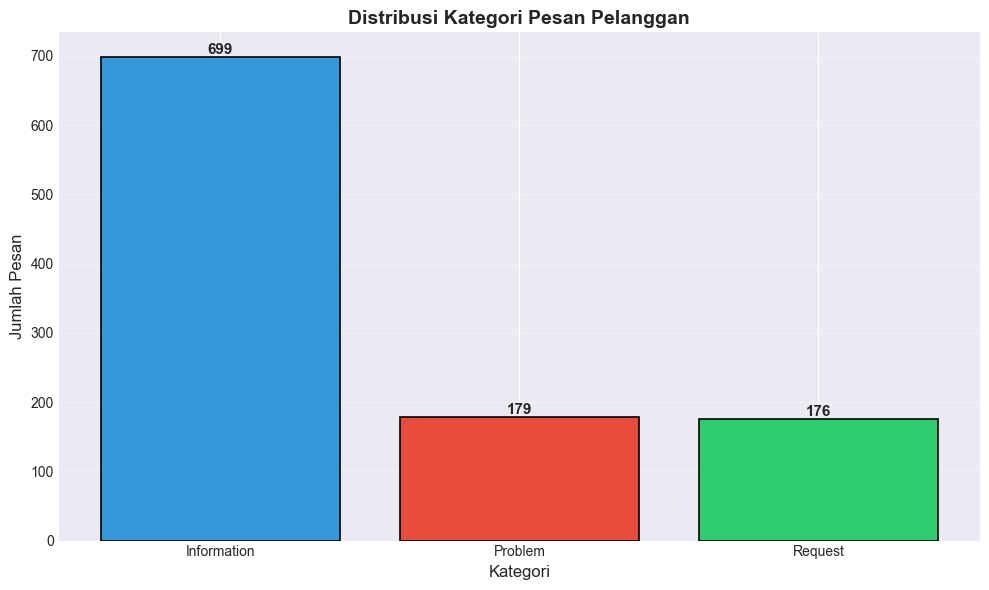

In [24]:
plt.figure(figsize=(10, 6))

colors = ['#3498db', '#e74c3c', '#2ecc71']
bars = plt.bar(label_counts.index, label_counts.values, 
               color=colors, edgecolor='black', linewidth=1.2)

for bar, count in zip(bars, label_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, count,
             f'{int(count)}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.title('Distribusi Kategori Pesan Pelanggan', fontsize=14, fontweight='bold')
plt.xlabel('Kategori', fontsize=12)
plt.ylabel('Jumlah Pesan', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### 5. Word Count
- Tahapan ini dilakukan untuk melihat distribusi kata pada dataset.

In [12]:
df['word_count'] = df['question'].apply(lambda x: len(str(x).split()))

print("Word Count:")
print(df['word_count'].describe())

print("\nWord Count per Kategori:")
print(df.groupby('label')['word_count'].describe())

Word Count:
count    1054.000000
mean        6.443074
std         4.389196
min         1.000000
25%         4.000000
50%         6.000000
75%         8.000000
max        95.000000
Name: word_count, dtype: float64

Word Count per Kategori:
             count      mean       std  min  25%  50%  75%   max
label                                                           
Information  699.0  6.380544  3.058825  1.0  4.0  6.0  8.0  24.0
Problem      179.0  6.826816  8.041896  1.0  3.0  5.0  8.0  95.0
Request      176.0  6.301136  3.554506  1.0  3.0  6.0  8.0  19.0


### Sampel Data per Kategori
- Tahapan ini dilakukan untuk memperlihatkan contoh data pada setiap kategori sebanyak 5 data.

In [25]:
print("SAMPLE DATA PER KATEGORI")

for label in df['label'].unique():
    print(f"Kategori: {label}")
    
    samples = df[df['label'] == label]['question'].head(5)
    for i, msg in enumerate(samples, 1):
        print(f"{i}. {msg}")
    print()

SAMPLE DATA PER KATEGORI
Kategori: Problem
1. internet mati nih
2. internet putus sambung
3. saya dapat isi formulir relokasi disubmit blank
4. ketika laku bayar dapat proses
5. internet mati

Kategori: Information
1. harga stb berapa
2. bantu informasi prosedur ganti paket layan
3. jika proses ganti paket layan lalu apps mybiznet dapat kendala salah order dicancel
4. order promo proses berkalikali
5. apa syarat ganti nama akun biznet

Kategori: Request
1. untuk ganti paket layan sekaligus bundling promo tahun
2. mau pasang baru
3. pasang baru
4. pasang baru jonggol paket 0d
5. bogor gunung putri



In [14]:
df.head()

,question,label,word_count
0,Internet mati nih,Problem,3
1,Harga STB berapa ya?,Information,4
2,Internet saya putus sambung,Problem,4
3,Mengapa saya tidak dapat mengisi formulir relokasi? setelah disubmit hanya blank,Problem,11
4,mengapa ketika ingin melakukan pembayaran tidak dapat diproses?,Problem,8


In [15]:
df = df.drop(columns='word_count')
df.head()

,question,label
0,Internet mati nih,Problem
1,Harga STB berapa ya?,Information
2,Internet saya putus sambung,Problem
3,Mengapa saya tidak dapat mengisi formulir relokasi? setelah disubmit hanya blank,Problem
4,mengapa ketika ingin melakukan pembayaran tidak dapat diproses?,Problem


## Preprocessing Data
- Tahapan yang dilakukan untuk memproses data agar siap untuk proses modeling.

### Import Library

In [16]:
import re
import string

import nltk
from nltk.tokenize import word_tokenize

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

from tqdm import tqdm
tqdm.pandas()

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Wahpram\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Wahpram\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Wahpram\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 1. Casefolding
- Casefolding merupakan tahapan untuk mengubah seluruh huruf kapital menjadi huruf kecil pada kolom question

In [17]:
df['question'] = df['question'].astype(str).str.lower()
df.head()

,question,label
0,internet mati nih,Problem
1,harga stb berapa ya?,Information
2,internet saya putus sambung,Problem
3,mengapa saya tidak dapat mengisi formulir relokasi? setelah disubmit hanya blank,Problem
4,mengapa ketika ingin melakukan pembayaran tidak dapat diproses?,Problem


### 2. Menghapus Noise
- Tahapan ini dilakukan untuk menghapus noise pada data, seperti url website.

In [18]:
def remove_noise(text):
    text = re.sub(r'http\S+|www\.\S+', '', text)
    text = re.sub(r'\S+@\S+', '', text)
    text = re.sub(r'@\w+', '', text) 
    text = re.sub(r'#\w+', '', text)
    
    return text

df['question'] = df['question'].apply(remove_noise)
df.head()

,question,label
0,internet mati nih,Problem
1,harga stb berapa ya?,Information
2,internet saya putus sambung,Problem
3,mengapa saya tidak dapat mengisi formulir relokasi? setelah disubmit hanya blank,Problem
4,mengapa ketika ingin melakukan pembayaran tidak dapat diproses?,Problem


### 3. Menghapus Tanda Punctuation
- Tahapan ini dilakukan untuk menghapus tanda baca pada data question.

In [19]:
def remove_punctuation(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

df['question'] = df['question'].apply(remove_punctuation)
df.head()

,question,label
0,internet mati nih,Problem
1,harga stb berapa ya,Information
2,internet saya putus sambung,Problem
3,mengapa saya tidak dapat mengisi formulir relokasi setelah disubmit hanya blank,Problem
4,mengapa ketika ingin melakukan pembayaran tidak dapat diproses,Problem


### 4. Menghapus Stop Word
- Tahapan ini dialkukan untuk menghapus stop word atau kata yang umum digunakan. 

In [20]:
factory = StopWordRemoverFactory()
stopword_remover = factory.create_stop_word_remover()

def remove_stopwords(text):
    text = stopword_remover.remove(text)
    return text

df['question'] = df['question'].apply(remove_stopwords)
df.head()

,question,label
0,internet mati nih,Problem
1,harga stb berapa,Information
2,internet putus sambung,Problem
3,saya dapat mengisi formulir relokasi disubmit blank,Problem
4,ketika melakukan pembayaran dapat diproses,Problem


### 5. Stemming
- Tahapan ini dilakukan untuk mengubah kata menjadi bentuk dasar.

In [21]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
    stemmed = stemmer.stem(text)
    return stemmed

df['question'] = df['question'].apply(stem_text)
df.head()

,question,label
0,internet mati nih,Problem
1,harga stb berapa,Information
2,internet putus sambung,Problem
3,saya dapat isi formulir relokasi disubmit blank,Problem
4,ketika laku bayar dapat proses,Problem


### Save Data
- Tahapan ini dilakukan untuk menyimpan data bersih ke dalam bentuk csv

In [23]:
df.to_csv('../data/clean/question_list_modeling.csv')